# HDSC FALL 22 STAGE E
**submitted by Apurv Deshpande**

In [34]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

In [35]:
#import the dataset
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [36]:
df.shape

(92016, 5)

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tmax,92016.0,231.696688,4562.128748,9.9000,17.30000,21.900000,27.600000,99999.9000
SysLoad,92016.0,797.623357,613.520156,-1596.8101,417.11980,856.467925,1221.293675,3264.1663
GasPrice,92016.0,6.016163,2.608116,0.0000,3.93690,5.165600,8.023300,29.9900
ElecPrice,92016.0,65.798356,213.144084,-924.8200,31.54375,48.715000,76.495000,14700.0000


In [38]:
#missing values
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [39]:
# Convert the FullDate column to DateTime object
df['FullDate']= pd.to_datetime(df['FullDate'])

In [40]:
# Set FullDate as an index
df.set_index('FullDate', inplace = True) 

In [41]:
#resample, from hourly to daily
df_daily_rate = df.resample('D').sum()

In [42]:
df_daily_rate.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [43]:
df_daily_rate.shape #3834 values

(3834, 4)

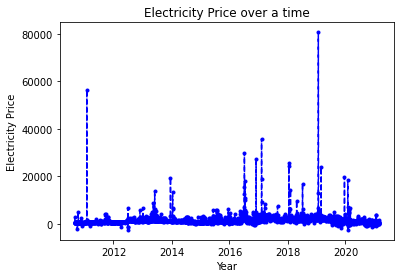

In [44]:
#Q11 plotting electricity price over time
plt.plot(df_daily_rate.index, df_daily_rate.ElecPrice, '--', marker='.',color='blue')
plt.xlabel('Year')
plt.ylabel('Electricity Price')
plt.title('Electricity Price over a time')
plt.show()

In [45]:
#Q12  P-value of the SysLoad and GasPrice of the resampled Data set
pvs = adfuller(df_daily_rate['SysLoad']) 
pvg = adfuller(df_daily_rate['GasPrice']) 
round(pvs[1], 6), round(pvg[1], 6)

(0.004254, 0.045027)

In [46]:
#Q13 what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set
cv_elecprice = adfuller(df_daily_rate['ElecPrice'])
round(pvg[4]['10%'], 4), round(cv_elecprice[4]['5%'], 4)

(-2.5672, -2.8623)

FOR QUESTIONS FROM 14, we need to split the data into train and test sets, and also require to implement the model..

In [47]:
# Splitting the daily sampled rate into train and test 
train_data = df_daily_rate.iloc[:2757,:]
test_data = df_daily_rate.iloc[2757:,:]
train_data.shape , test_data.shape

((2757, 4), (1077, 4))

In [48]:
# Reset the index
train_data.reset_index(inplace = True)
train_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [49]:
# we have to rename the FullDate and ElecPrice columns as follows
df_train = train_data.iloc[:,[0,-1]]
df_train = df_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [50]:
# Reset the index
test_data.reset_index(inplace = True)
test_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [51]:
# we have to rename the FullDate and ElecPrice columns as follows
df_test = test_data.iloc[:,[0,-1]]
df_test = df_test.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_test.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [52]:
# Model Implementation
model = Prophet()
model.fit(df_train)
forecast_result = model.predict(df_test) 
forecast_result.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3hzurv9/771e866d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp3hzurv9/4h1qrjid.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7388', 'data', 'file=/tmp/tmpp3hzurv9/771e866d.json', 'init=/tmp/tmpp3hzurv9/4h1qrjid.json', 'output', 'file=/tmp/tmpp3hzurv9/prophet_model363c_qe5/prophet_model-20230126121922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:19:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:19:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2684.565824,284.045791,5063.125118,2684.565824,2684.565824,-155.040628,-155.040628,-155.040628,9.737379,9.737379,9.737379,-164.778008,-164.778008,-164.778008,0.0,0.0,0.0,2529.525196
1,2018-03-21,2685.359782,249.193816,5274.368812,2685.359782,2685.359782,-2.567491,-2.567491,-2.567491,159.353195,159.353195,159.353195,-161.920686,-161.920686,-161.920686,0.0,0.0,0.0,2682.792291
2,2018-03-22,2686.153740,375.090776,5181.518437,2686.153740,2686.153740,95.607310,95.607310,95.607310,257.107547,257.107547,257.107547,-161.500237,-161.500237,-161.500237,0.0,0.0,0.0,2781.761050
3,2018-03-23,2686.947698,180.819347,4993.360715,2686.947698,2686.947698,-113.077820,-113.077820,-113.077820,50.273097,50.273097,50.273097,-163.350918,-163.350918,-163.350918,0.0,0.0,0.0,2573.869878
4,2018-03-24,2687.741656,132.766357,4661.076430,2687.741656,2687.741656,-438.673661,-438.673661,-438.673661,-271.443120,-271.443120,-271.443120,-167.230541,-167.230541,-167.230541,0.0,0.0,0.0,2249.067995


In [53]:
#MAPE
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [54]:
#q14 Evaluating the results of your time series model on the test set, what is the MAPE
MAPE = Metric(df_test['y'],forecast_result['yhat'])
round(MAPE,2)

544.73

In [55]:
#q15 What is the RMSE in 2 decimal places?
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(df_test['y'],forecast_result['yhat']))
round(RMSE,2)

3208.06

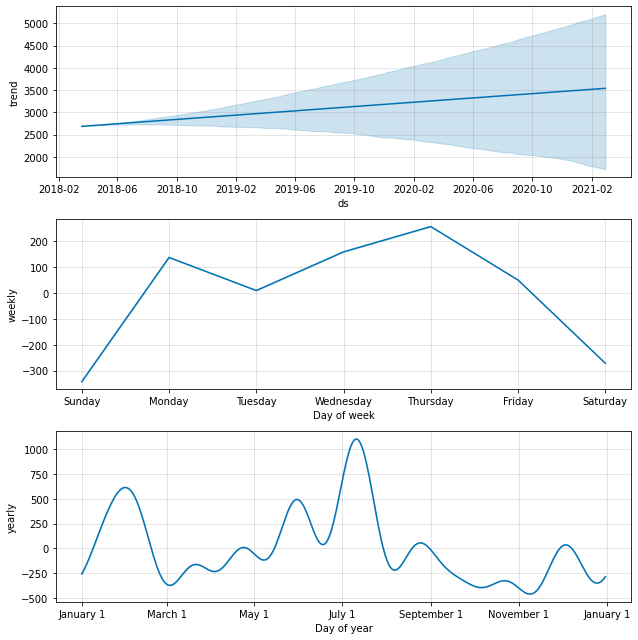

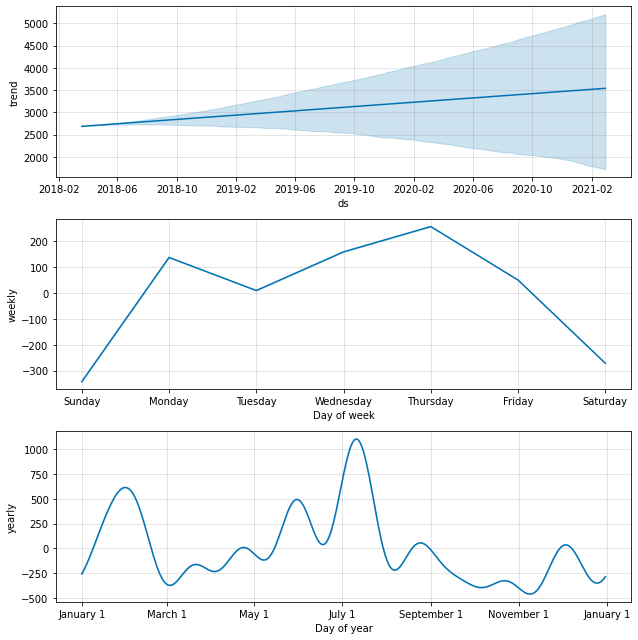

In [56]:
#q16 plot the components from the forecasted model, what month of the yearly seasonality has the highest value?
model.plot_components(forecast_result)

In [56]:
#for questions 17 to 19, 

Now, we consider the Multivariate Time Series Model

In [ ]:
# Reset the index
df_daily_rate.reset_index(inplace=True)

In [ ]:
# Rename the columns as mentioned 
dsr = df_daily_rate.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3',
                                           'ElecPrice':'y'})

In [60]:
# Split the dataset into train and test sets
train_dsr = dsr.iloc[:2757,:]
test_dsr = dsr.iloc[2757:,:]

In [ ]:
# Model implementation
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2 = model2.fit(train_dsr)

In [62]:
forecast_new_result = model2.predict(test_dsr)

In [63]:
#q17 Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?
MAPE = Metric(test_dsr['y'],forecast_new_result['yhat'])
round(MAPE,2)

231.91

In [64]:
#q18 What is the RMSE in 2 decimal places
RMSE = np.sqrt(metrics.mean_squared_error(test_dsr['y'],forecast_new_result['yhat']))
round(RMSE,2)

2707.61

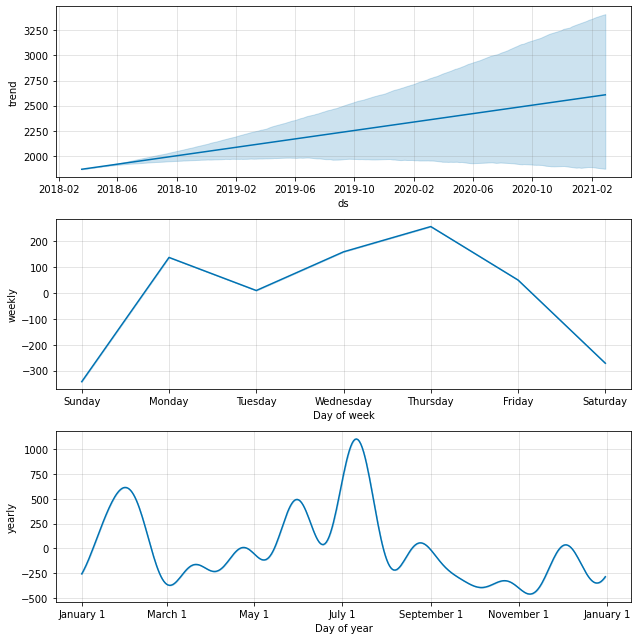

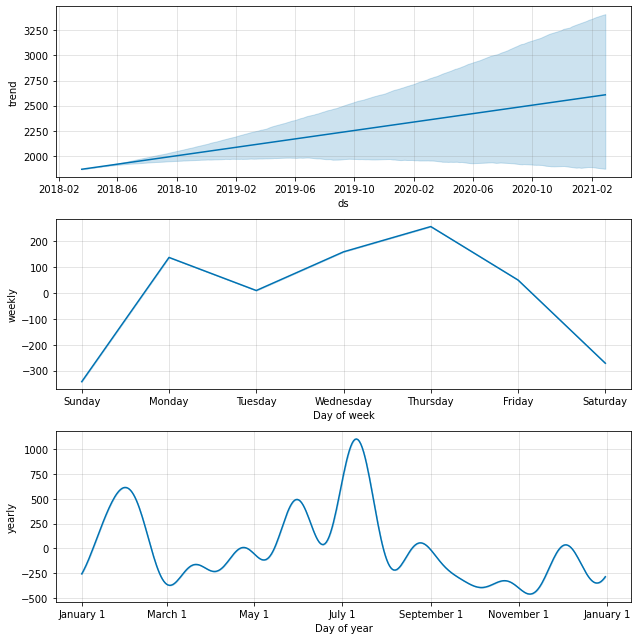

In [65]:
model.plot_components(forecast_new_result)

Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

In [66]:
# Split the dataset
trainData = df_daily_rate.iloc[:2757,:]
testData = df_daily_rate.iloc[2757:,:]
trainData.shape , testData.shape

((2757, 5), (1077, 5))

In [67]:
# Exclude the Tmax 
train_df = trainData.iloc[:,[0,2,3,4]]
test_df = testData.iloc[:,[0,2,3,4]]

In [68]:
# Exclude the Tmax 
train_df = trainData.iloc[:,[0,2,3,4]]
test_df = testData.iloc[:,[0,2,3,4]]
# Rename the columns
train_df = train_df.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})
test_df = test_df.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})
train_df.head(2)

,ds,add1,add2,y
0,2010-09-01,41565.38,88.56,2751.70
1,2010-09-02,38898.99,88.56,570.81


In [ ]:
# Model Implementation
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model = model.fit(train_df)
forecast_values_new = model.predict(test_df)

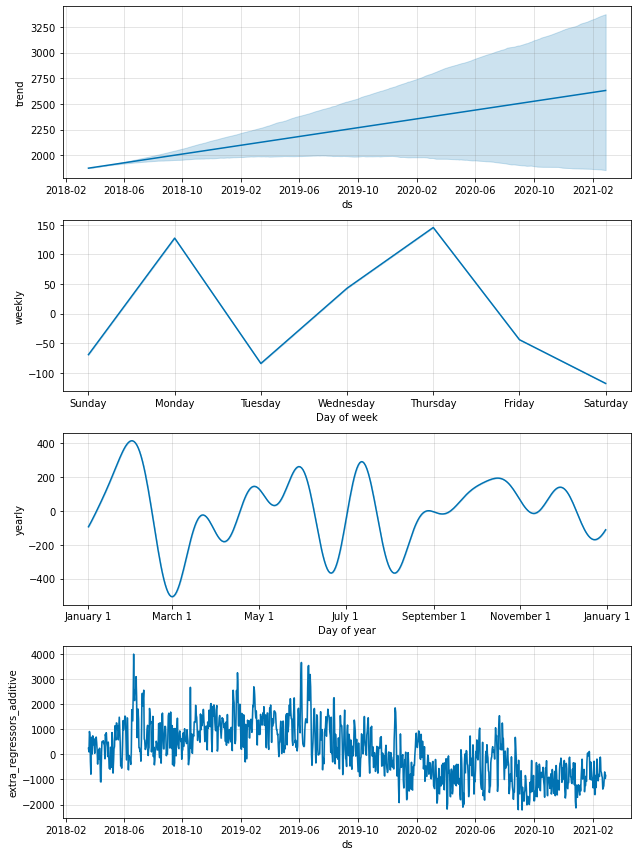

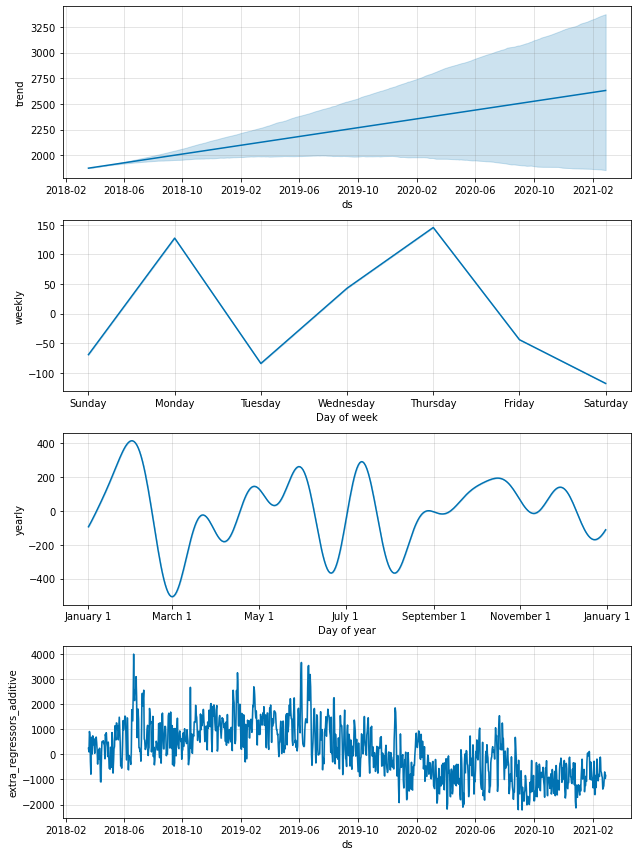

In [71]:
#Q19 what day of the daily seasonality has the highest value?
model.plot_components(forecast_values_new)

In [70]:
#Q20 the mean absolute percentage error (MAPE) to 2 decimal places on the test set?
MAPE = Metric(test_df['y'],forecast_values_new['yhat'])
round(MAPE,2)

235.11

thank you!